In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import seaborn as sns

In [106]:
df = pd.read_csv("Salary_Data.csv")
x = df["YearsExperience"]
y = df["Salary"]

In [107]:
from sklearn.model_selection import train_test_split
import torch

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=87)
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

x_train = torch.from_numpy(x_train)
x_test = torch.from_numpy(x_test)
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)

In [108]:
from torch import nn

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.w = nn.Parameter(torch.rand(1, requires_grad=True))
    self.b = nn.Parameter(torch.rand(1, requires_grad=True))

  def forward(self, x):
    return self.w*x + self.b

In [109]:
torch.manual_seed(87)
model = LinearRegressionModel()
# list(model.parameters())
model.state_dict()

OrderedDict([('w', tensor([0.0036])), ('b', tensor([0.8931]))])

In [110]:
y_pred = model(x_test)
y_pred, y_test

(tensor([0.9149, 0.9312, 0.8953, 0.9145, 0.9279, 0.9065, 0.8978],
        dtype=torch.float64, grad_fn=<AddBackward0>),
 tensor([ 93.9000, 121.8000,  36.6000,  81.3000, 112.6000,  57.1000,  46.2000],
        dtype=torch.float64))

In [111]:
cost_fn = nn.MSELoss()
y_pred = model(x_train)
cost = cost_fn(y_pred, y_train)
print(model.state_dict())
print(cost)

optimizer = torch.optim.SGD(params=model.parameters(),lr=0.01)
optimizer.zero_grad()
cost.backward()#計算參數
optimizer.step()

y_pred = model(x_train)
cost = cost_fn(y_pred, y_train)
print(model.state_dict())
print(cost)

OrderedDict({'w': tensor([0.0036]), 'b': tensor([0.8931])})
tensor(5627.4383, dtype=torch.float64, grad_fn=<MseLossBackward0>)
OrderedDict({'w': tensor([8.1354]), 'b': tensor([2.2939])})
tensor(944.6855, dtype=torch.float64, grad_fn=<MseLossBackward0>)


In [112]:
Epoch = 10000
train_cost_hist = [ ]
test_cost_hist = [ ]
for i in range(Epoch):
    model.train()
    y_pred = model(x_train)
    train_cost = cost_fn(y_pred,y_train)
    train_cost_hist.append(train_cost.detach().numpy())
    optimizer.zero_grad()
    train_cost.backward()
    optimizer.step()

    model.eval()
    with (torch.inference_mode()):
        test_pred = model(x_test)
        test_cost = cost_fn(test_pred,y_test)
        test_cost_hist.append(test_cost.detach().numpy())

    if (i%100 == 0):
        print(f"Epoch {i:5} cost {train_cost:.4e} test_cost {test_cost:.4e}")

Epoch     0 cost 9.4469e+02 test_cost 3.5138e+02
Epoch   100 cost 8.4788e+01 test_cost 1.5017e+02
Epoch   200 cost 5.1465e+01 test_cost 8.8149e+01
Epoch   300 cost 3.9417e+01 test_cost 6.0928e+01
Epoch   400 cost 3.5061e+01 test_cost 4.8202e+01
Epoch   500 cost 3.3486e+01 test_cost 4.1867e+01
Epoch   600 cost 3.2916e+01 test_cost 3.8534e+01
Epoch   700 cost 3.2710e+01 test_cost 3.6702e+01
Epoch   800 cost 3.2636e+01 test_cost 3.5663e+01
Epoch   900 cost 3.2609e+01 test_cost 3.5061e+01
Epoch  1000 cost 3.2599e+01 test_cost 3.4706e+01
Epoch  1100 cost 3.2596e+01 test_cost 3.4496e+01
Epoch  1200 cost 3.2595e+01 test_cost 3.4371e+01
Epoch  1300 cost 3.2594e+01 test_cost 3.4296e+01
Epoch  1400 cost 3.2594e+01 test_cost 3.4251e+01
Epoch  1500 cost 3.2594e+01 test_cost 3.4224e+01
Epoch  1600 cost 3.2594e+01 test_cost 3.4208e+01
Epoch  1700 cost 3.2594e+01 test_cost 3.4199e+01
Epoch  1800 cost 3.2594e+01 test_cost 3.4193e+01
Epoch  1900 cost 3.2594e+01 test_cost 3.4189e+01
Epoch  2000 cost 3.2

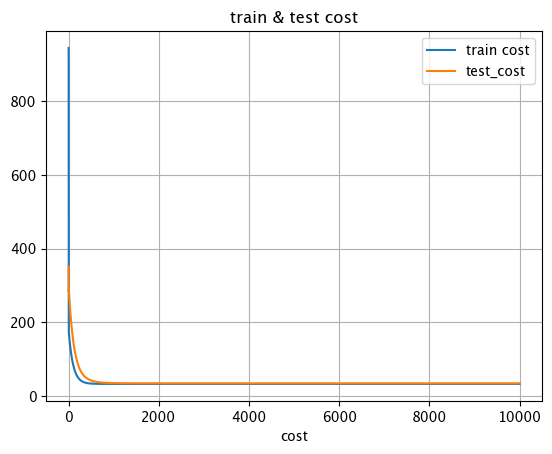

In [113]:
import matplotlib.pyplot as plt
plt.plot(range(0,Epoch),train_cost_hist,label="train cost")
plt.plot(range(0,Epoch),test_cost_hist,label ="test_cost")
plt.title("train & test cost")
plt.xlabel("epcochs")
plt.xlabel("cost")
plt.legend()
plt.grid()
plt.show()

In [114]:
model.eval()
with (torch.inference_mode()):
    y_pred = model(x_test)
y_pred,y_test

(tensor([ 82.6135, 124.6020,  32.2271,  81.6804, 116.2043,  61.1526,  38.7587],
        dtype=torch.float64),
 tensor([ 93.9000, 121.8000,  36.6000,  81.3000, 112.6000,  57.1000,  46.2000],
        dtype=torch.float64))

In [115]:
model.state_dict()
torch.save(obj=model.state_dict(),f="pytorch_linear_regression.ptn")

In [116]:
model_1 = LinearRegressionModel()
model_1.state_dict()


OrderedDict([('w', tensor([0.4548])), ('b', tensor([0.9815]))])

In [117]:
model_1.load_state_dict(torch.load(f="pytorch_linear_regression.ptn"))
model_1.state_dict()

OrderedDict([('w', tensor([9.3308])), ('b', tensor([26.6287]))])